# PyCon 2023

Esta charla se preparó para la [PyCon 2023 Chile](https://www.pycon.cl/).

### Objetivo de hoy

Estamos lanzando una startupPropTech. Necesitamos recolectar información sobre los arriendos en Valparaiso. 

![Se arriendo](./Arriendo.jpeg)

👉 Nuestra idea: entrar en [Portal Inmobiliario](https://www.portalinmobiliario.com) y sacar toda la info!

> A mano? 😳 🤯

> Definitivamente NO! 😉

 Queres obtener esta información de manera programática:

![Datos de Depa](./Data.png)

Para eso, necesitaremos aprender sobre:

1. **Estructura de datos** en *Python*: listas y diccionarios
2. **Recolección** de datos utilizando **WebScraping**
3. **Visualización** utilizando librerías de Python (Plotly / Seaborn)

### Estructura de Datos

**Listas**

- Indice (posición)
- Puedo leer, agregar, modificar o eliminar

In [1]:
students = ["Sebas", "Fede", "Camila"]

In [2]:
age = [32, 28, 26]

In [3]:
age[0]

32

**Diccionarios**

- Parejas: `clave` : `valor`
- No tiene indices
- Las claves son únicas

In [5]:
{'name': 'Sebas', 'age': 32}

{'name': 'Sebas', 'age': 32}

**Entonces...**

In [6]:
students = [
    {'name': 'Sebas', 'age': 32},
    {'name': 'Fede', 'age': 29},
    {'name': 'Camila', 'age': 26}
]

### Web 101

![HTTP Request](./Web.png)

---

![HTML Tag](./Tags.png)

### OK, let's go!

##### Importamos la librerías de Python que necesitamos

In [16]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import re

Pedido de información a la web:

In [17]:
url = "https://www.portalinmobiliario.com/arriendo/departamento/valparaiso/"
response = requests.get(url)
soup = BeautifulSoup(response.content)

In [18]:
# Si quisiera hacerlo con la *Region Metropolitana*
# "https://www.portalinmobiliario.com/arriendo/departamento/santiago-metropolitana/"

In [19]:
pages = np.arange(1, 40*42, 42).tolist()

##### Funcion de recolección

In [24]:
def transform_html_to_data(soup):
    apartments_data = soup.find_all(class_='ui-search-layout__item')
    apartments = []
    for apartment in apartments_data:
        price = apartment.find('span', class_='andes-money-amount__fraction').text
        price = int(price.replace(".", ""))
        address = apartment.find(class_='ui-search-item__group__element ui-search-item__location-label').text
        space_information = apartment.find(class_='ui-search-card-attributes ui-search-item__group__element ui-search-item__attributes-grid').text
        if space_information:
            size = re.search(r'(\d+) m', space_information)
            if size:
                size = int(size.group(1))
            rooms = re.search(r'(\d+) dormitorio', space_information)
            if rooms:
                rooms = int(rooms.group(1))
        data = {'price (CLP)': price, 'rooms': rooms, 'size (m2)': size, 'address': address}
        apartments.append(data)

    return apartments

##### Iteramos según cuantas `pages` haya disponibles

In [25]:
apartments_list = []
for page in pages:
    url = "https://www.portalinmobiliario.com/arriendo/departamento/valparaiso/_Desde_" + str(page) + "_NoIndex_True"
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    # {'price (CLP)': price, 'rooms': rooms, 'size (m2)': size, 'address': address}
    apartments_list += transform_html_to_data(soup)

In [26]:
apartments_list[0]

{'price (CLP)': 1400000,
 'rooms': 3,
 'size (m2)': 117,
 'address': 'Avenida Edmundo Eluchans, Reñaca, ...'}

**Cuantos departamentos pudimos recuperar?**

In [27]:
len(apartments_list)

1920

In [28]:
apartments_list

[{'price (CLP)': 1400000,
  'rooms': 3,
  'size (m2)': 117,
  'address': 'Avenida Edmundo Eluchans, Reñaca, ...'},
 {'price (CLP)': 380000,
  'rooms': 3,
  'size (m2)': 43,
  'address': 'Cardenal Samoré 1395 Departamento,...'},
 {'price (CLP)': 18,
  'rooms': 2,
  'size (m2)': 70,
  'address': 'Entrelomas, Costas De Montemar, Co...'},
 {'price (CLP)': 23,
  'rooms': 3,
  'size (m2)': 78,
  'address': 'Los Abedules, Montemar, Concón'},
 {'price (CLP)': 420000,
  'rooms': 3,
  'size (m2)': 70,
  'address': 'Avenida Francia, Valparaíso'},
 {'price (CLP)': 400000,
  'rooms': 3,
  'size (m2)': 60,
  'address': 'Avenida Cardenal Samoré, Curauma, ...'},
 {'price (CLP)': 490000,
  'rooms': 1,
  'size (m2)': 37,
  'address': 'Edmundo Eluchans, Costas De Montem...'},
 {'price (CLP)': 500000,
  'rooms': 3,
  'size (m2)': 77,
  'address': 'Los Pinos, Valparaíso'},
 {'price (CLP)': 580000,
  'rooms': 3,
  'size (m2)': 80,
  'address': 'San Luis, Cerro Placeres, Valparaí...'},
 {'price (CLP)': 40000

##### Transformamos los datos a un DataFrame

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame(apartments_list)
df.head()

,price (CLP),rooms,size (m2),address
0,1400000,3.0,117.0,"Avenida Edmundo Eluchans, Reñaca, ..."
1,380000,3.0,43.0,"Cardenal Samoré 1395 Departamento,..."
2,18,2.0,70.0,"Entrelomas, Costas De Montemar, Co..."
3,23,3.0,78.0,"Los Abedules, Montemar, Concón"
4,420000,3.0,70.0,"Avenida Francia, Valparaíso"


In [54]:
df.shape

(1920, 4)

##### Limpiamos la información

- Falta de información

In [55]:
df.isna().sum()

price (CLP)     0
rooms           8
size (m2)      33
address         0
dtype: int64

In [56]:
df.dropna(inplace=True)
df.shape

(1879, 4)

- Outliers

> Precio de arriendo menor a 2.5 MCLP

In [57]:
condition = df['price (CLP)'] < 2500000
df = df[condition]

In [58]:
df.shape

(1878, 4)

> Precio mayor a 1000 CLP

In [59]:
condition = df['price (CLP)'] > 1000
df = df[condition]

In [60]:
df.shape

(1774, 4)

> Menos de 5 piezas

In [61]:
condition = df['rooms'] < 5 
df = df[condition]

In [62]:
df.shape

(1770, 4)

### Data Visualization

In [63]:
import seaborn as sns
import plotly.express as px

In [64]:
fig = px.scatter(df, x="size (m2)", y="price (CLP)", size="rooms", title="Precio vs. Tamaño", width=800, height=600)
fig.show()

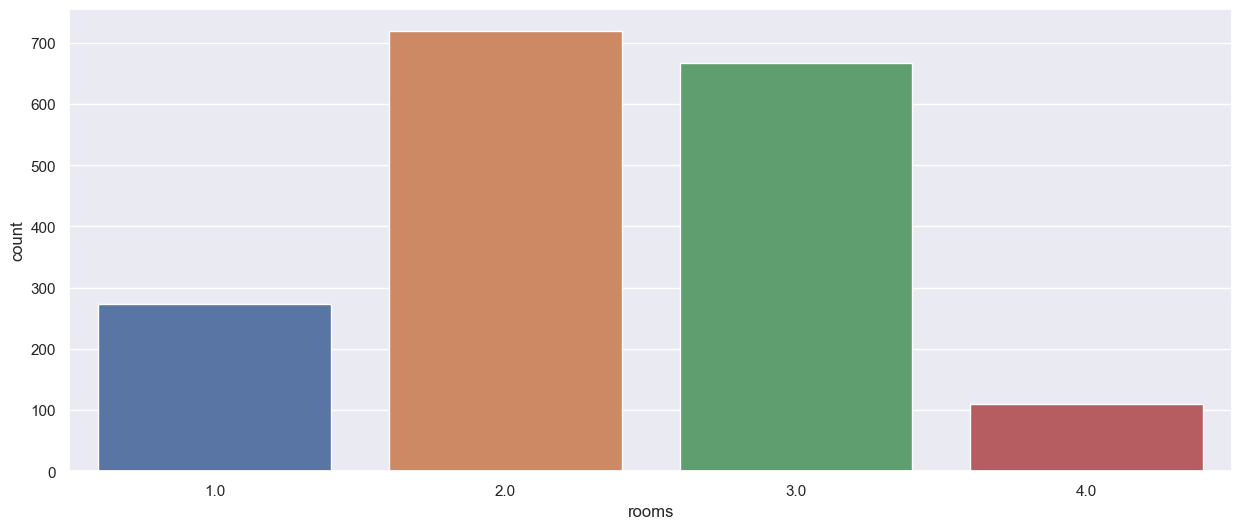

In [65]:
sns.countplot(x="rooms", data=df)
sns.set(rc={'figure.figsize':(15, 6)})

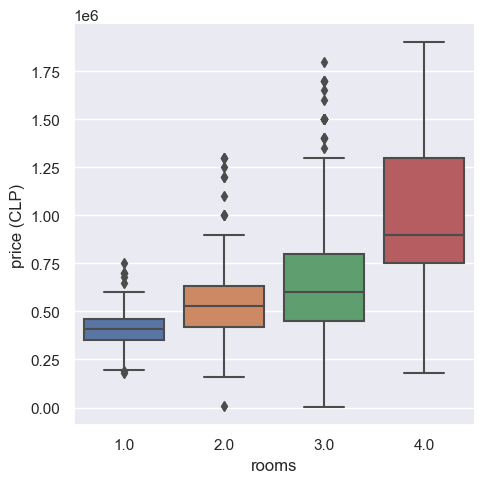

In [66]:
sns.catplot(x='rooms', y='price (CLP)', data=df, kind="box")

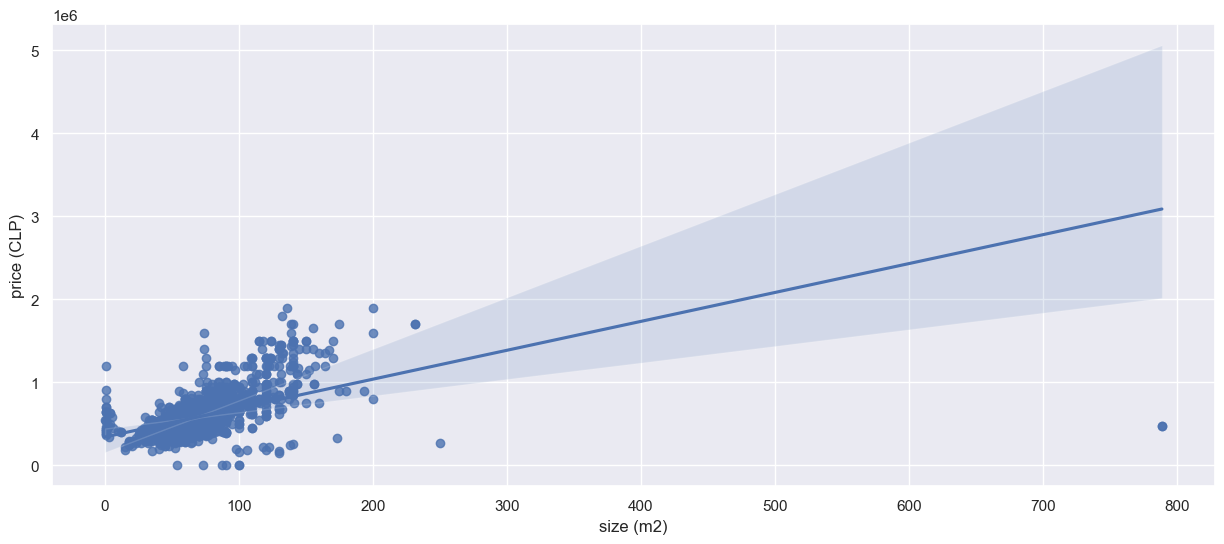

In [67]:
sns.regplot(x='size (m2)', y='price (CLP)', data=df)
sns.set(rc={'figure.figsize':(15, 6)})

In [68]:
condition = df['size (m2)'] < 100
df_max_size_200 = df[condition]

In [69]:
df.shape

(1770, 4)

In [70]:
df_max_size_200.shape

(1532, 4)

<AxesSubplot:xlabel='size (m2)', ylabel='price (CLP)'>

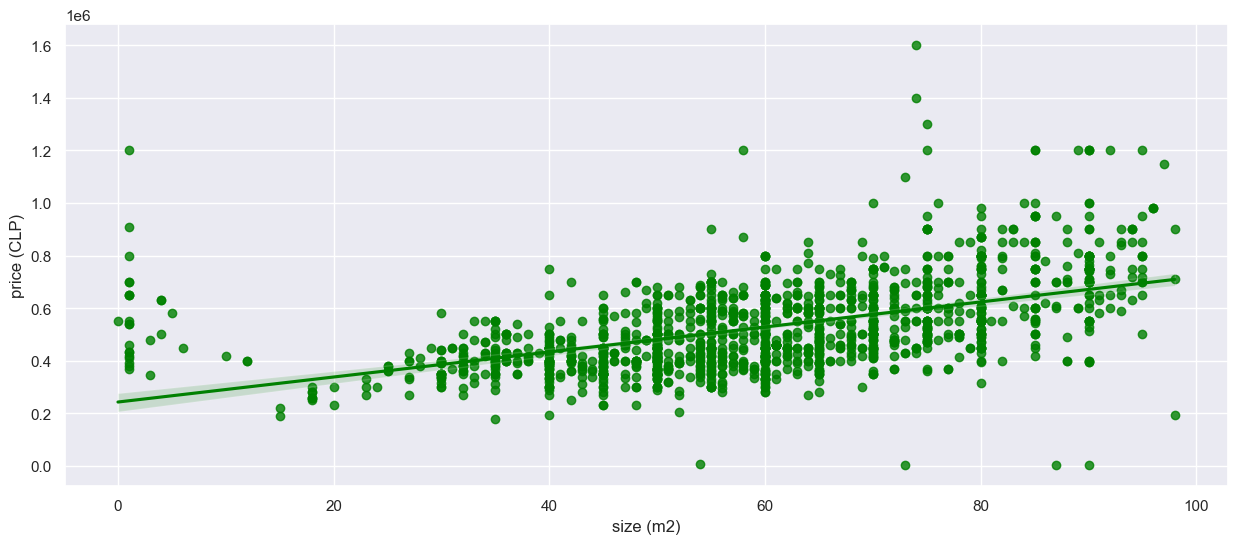

In [71]:
sns.regplot(x='size (m2)', y='price (CLP)', data=df_max_size_200, color='green')

##### Exportemos a CSV

Aprovechando la librería de **Pandas**, utilizamos solo `.to_csv()`

In [72]:
df_max_size_200.to_csv('./Valparaiso.csv')

### OK, let's do `NO CODE`

[Browse AI](https://dashboard.browse.ai/tasks)